In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import warnings

Yelp Dataset Challenge: https://www.yelp.com/dataset/challenge<br />
Round 11: January 18, 2018&ndash;June 30, 2018

In [477]:
c = pd.read_json('dataset/business.json', lines=True)

In [247]:
states = ['AZ', 'NV', 'OH', 'PA', 'ON', 'QC']
d = c[c.state.isin(states)][c.attributes.apply(lambda x: ('GoodForMeal' in x))]

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [248]:
cats, counts = np.unique(np.concatenate(d.categories.values), return_counts=True)

In [540]:
c['included'] = False
cat_avg = []
cat_sem = []
cat_count = []
states = ['AZ', 'NV', 'OH', 'PA', 'ON', 'QC']
met_areas = ['Phoenix (5.8k)', 'Las Vegas (3.8k)', 'Cleveland (2.6k)', 'Pittsburgh (1.9k)', 'Toronto (5.7k)', 'Montreal (1.9k)']
pop_cats = list(cats[counts>100])
excluded_cats = ['Venues & Event Spaces', 'Event Planning & Services', 
                 'Arts & Entertainment', 'Music Venues', 'Hotels & Travel']
for excluded_cat in excluded_cats:
    if excluded_cat in pop_cats:
        pop_cats.remove(excluded_cat)
for pop_cat in pop_cats:
    c.loc[c.state.isin(states) & c.categories.apply(lambda x: (pop_cat in x)),'included'] = True
    e = c[c.state.isin(states)][c.categories.apply(lambda x: (pop_cat in x))].stars
    cat_avg.append(e.mean())
    cat_sem.append(e.sem())
    cat_count.append(e.count())

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


In [565]:
c['ethnic_included'] = False
for cat in selected_ethnic_cat:
    c.loc[c.state.isin(states) & c.categories.apply(lambda x: (cat in x)),'ethnic_included'] = True

In [566]:
for state in states:
    print(state, c[c.state == state].ethnic_included.sum())

AZ 5880
NV 3809
OH 2578
PA 1927
ON 5659
QC 1885


In [541]:
state_avg = []
for state in states:
    print(state, c[c.included][c.state == state].stars.mean(), c[c.included][c.state == state].stars.sem(), c[c.included][c.state == state].stars.count())
    state_avg.append(c[c.included][c.state == state].stars.mean())
grand_avg = c[c.included].stars.mean()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


AZ 3.5724075223986516 0.00613428663793 22546


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


NV 3.5841258467952057 0.00718408311508 15352
OH 3.51417303426177 0.00994514857712 8114
PA 3.57967032967033 0.0107979123138 6370
ON 3.4039891663606316 0.00564917018827 21784
QC 3.6772937103289096 0.00964565414695 6932


In [542]:
df_pop_cat = pd.DataFrame(np.c_[pop_cats, cat_avg, cat_sem, cat_count], columns=['category', 'mean_rating', 'sem_rating', 'count_rating'])
df_pop_cat[['mean_rating', 'sem_rating', 'count_rating']] = df_pop_cat[['mean_rating', 'sem_rating', 'count_rating']].apply(pd.to_numeric)
df_pop_cat['freq_rating'] = df_pop_cat['count_rating']/sum(c.included)
df_pop_cat['log_freq_rating'] = np.log10(df_pop_cat['freq_rating'])
pd.set_option("display.max_rows",1000)
df_pop_cat.sort_values('mean_rating')

,category,mean_rating,sem_rating,count_rating,freq_rating,log_freq_rating
33,Fast Food,2.843756,0.012708,4989,0.061518,-1.210997
20,Chicken Wings,2.966631,0.020514,1858,0.022911,-1.639964
89,Tex-Mex,2.997018,0.031700,503,0.006202,-2.207442
12,Burgers,3.052882,0.014381,3782,0.046635,-1.331289
11,Buffets,3.059647,0.027210,679,0.008373,-2.077140
81,Sports Bars,3.241445,0.016856,1578,0.019458,-1.710903
21,Chinese,3.296467,0.011679,3368,0.041530,-1.381638
28,Dim Sum,3.305677,0.038303,229,0.002824,-2.549175
1,American (Traditional),3.326136,0.010223,4909,0.060532,-1.218017
67,Pizza,3.343524,0.011605,5119,0.063121,-1.199825


In [543]:
ethnic_names = ['Tex-Mex', 'Chinese', 'American (Traditional)', 'Irish', 'Canadian (New)', 'Mexican', 'Taiwanese', 'Pakistani', 'Filipino', 'Italian', 'American (New)', 'Indian', 'British', 'Thai', 'Japanese', 'Portuguese', 'Asian Fusion', 'Vietnamese', 'Korean', 'Southern', 'Greek', 'Persian/Iranian', 'Middle Eastern', 'Carribean', 'Spanish', 'French', 'Hawaiian', 'African', 'Lebanese', 'Latin American', 'German', 'Modern European', 'Turkish']
df_pop_cat[df_pop_cat.category.isin(ethnic_names)].sort_values('mean_rating', ascending=False).head(10)

,category,mean_rating,sem_rating,count_rating,freq_rating,log_freq_rating
62,Modern European,3.932099,0.045186,162,0.001998,-2.699495
57,Latin American,3.914815,0.030908,405,0.004994,-2.301555
40,French,3.827606,0.022204,873,0.010765,-1.967996
46,Hawaiian,3.821293,0.039425,263,0.003243,-2.489054
79,Spanish,3.800781,0.055830,128,0.001578,-2.801800
68,Portuguese,3.692478,0.042158,226,0.002787,-2.554902
66,Persian/Iranian,3.683007,0.057119,153,0.001887,-2.724319
61,Middle Eastern,3.655119,0.025179,967,0.011924,-1.923584
56,Korean,3.636430,0.023852,689,0.008496,-2.070791
78,Southern,3.633065,0.044648,248,0.003058,-2.514558


In [544]:
df_pop_cat[df_pop_cat.category.isin(ethnic_names)].sort_values('count_rating', ascending=False).head(15)

,category,mean_rating,sem_rating,count_rating,freq_rating,log_freq_rating
1,American (Traditional),3.326136,0.010223,4909,0.060532,-1.218017
52,Italian,3.505297,0.012453,3681,0.045390,-1.343044
60,Mexican,3.429614,0.012932,3495,0.043096,-1.365563
21,Chinese,3.296467,0.011679,3368,0.041530,-1.381638
0,American (New),3.531182,0.011871,3239,0.039939,-1.398599
53,Japanese,3.581412,0.014577,2039,0.025142,-1.599593
15,Canadian (New),3.471029,0.019112,1467,0.018089,-1.742580
2,Asian Fusion,3.587892,0.017913,1371,0.016905,-1.771973
90,Thai,3.526863,0.020980,1154,0.014230,-1.846804
50,Indian,3.542688,0.020480,1101,0.013576,-1.867223


In [506]:
from colour import Color
colors = list(Color("darkorange").range_to(Color("#ee3b3b"),1001))

In [545]:
df_pop_cat['color'] = df_pop_cat.mean_rating.apply(lambda x: 
    colors[np.round(1000*(x-df_pop_cat.mean_rating.min())/
                    (df_pop_cat.mean_rating.max()-df_pop_cat.mean_rating.min())).astype(int)].hex)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


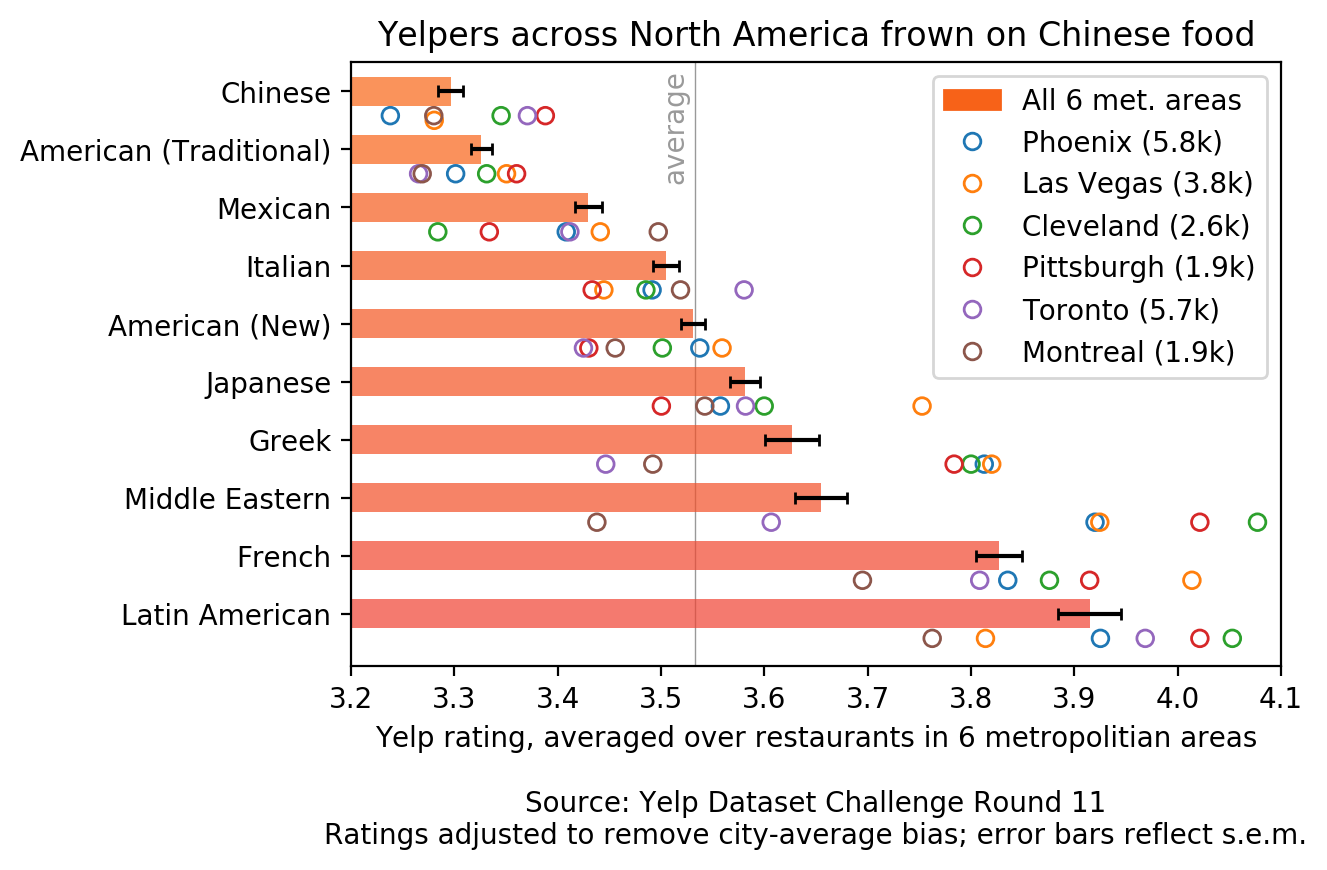

In [571]:
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

selected_ethnic_cat = ['American (Traditional)', 
    'Mexican', 'American (New)', 'Italian', 'Chinese', 'Japanese', 'Latin American', 
    'Middle Eastern', 'French', 'Greek']

f = df_pop_cat[df_pop_cat.category.isin(selected_ethnic_cat)].set_index('category').sort_values('mean_rating',ascending=False)

plt.figure(dpi=200)

f.plot.barh(y='mean_rating',
    xerr='sem_rating', legend=False, capsize=2, title='Yelpers across North America frown on Chinese food', color=f.color, alpha=0.7, ax=plt.gca())

reordered_ethnic_cat = list(df_pop_cat[df_pop_cat.category.isin(selected_ethnic_cat)].set_index('category').sort_values('mean_rating',ascending=False).index)

cgraph = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5']

handle = [[], [], [], [], [], []]
for i, pop_cat in enumerate(reordered_ethnic_cat):
    #print (pop_cat)
    for j,state in enumerate(states):
        plt.scatter(c[c.state==state][c.categories.apply(lambda x: (pop_cat in x))].stars.mean() - state_avg[j] + grand_avg, i-0.42 if (pop_cat, state) != ('Chinese', 'NV') else i-0.5, zorder=2, 
                    alpha=1, facecolors='none', edgecolors=cgraph[j], label=state)
        #print(c[c.state==state][c.categories.apply(lambda x: (pop_cat in x))].stars.count())
circles = []
circles.append(mpatches.Rectangle((0,0),1,1, color=colors[400].hex))
for j in range(6):
    circles.append(mlines.Line2D([0], [0], color="white", marker='o', markeredgecolor=cgraph[j], alpha=1))
#plt.scatter(state_avg, np.repeat(9.5, len(state_avg)), c=cgraph, marker='v', alpha=1)
plt.vlines(grand_avg, -1, 9.5, lw=0.5, zorder=-1, alpha=0.4)
plt.text(3.5, 9, 'average', alpha=0.4,rotation='vertical')
plt.legend(circles,['All 6 met. areas'] + met_areas)
plt.xlabel('Yelp rating, averaged over restaurants in 6 metropolitian areas\n\nSource: Yelp Dataset Challenge Round 11\nRatings adjusted to remove city-average bias; error bars reflect s.e.m.')
plt.ylabel('')
plt.xlim([3.2,4.1])
plt.ylim([-0.9,9.5])
plt.savefig('output1.png', bbox_inches='tight')
plt.show()

(Raw sample counts: Chinese: Phoenix 627 restaurants, Las Vegas 508, Cleveland 291, Pittsburgh 230, Toronto 1454, Montreal 258; American (Traditional): 1494, 961, 944, 634, 755, 121; Mexican: 1607, 919, 296, 180, 373, 120; Italian: 844, 483, 404, 427, 1091, 432; American (New): 1156, 703, 657, 475, 223, 25 (twenty-five); Japanese: 325, 395, 111, 85, 890, 233; Greek: 220, 66, 64, 56, 285, 110; Middle Eastern: 111, 62, 77, 44, 515, 158; French: 64, 77, 21, 26, 209, 476; Latin American: 85, 89, 44, 22, 106, 59)